In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/placement (1).csv')

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
df.shape

(1000, 3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-27-a73ab0776497>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-27-a73ab0776497>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

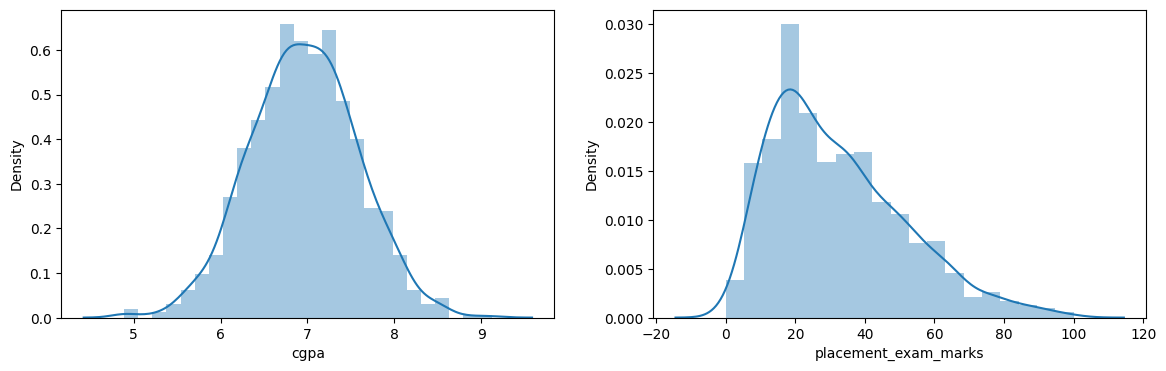

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [ ]:
print("Mean value of cgpa: ",df['cgpa'].mean())
print("Standard deviation value of cgpa: ",df['cgpa'].std())
print("Min value of cgpa: ",df['cgpa'].min())
print("Max value of cgpa: ",df['cgpa'].max())


Mean value of cgpa:  6.96124
Standard deviation value of cgpa:  0.6158978751323896
Min value of cgpa:  4.89
Max value of cgpa:  9.12


In [ ]:

print("Upper Boundary of cgpa:", df['cgpa'].mean() + 3 * df['cgpa'].std())
print("Lower Boundary of cgpa:", df['cgpa'].mean() - 3 * df['cgpa'].std())


Upper Boundary of cgpa: 8.808933625397168
Lower Boundary of cgpa: 5.113546374602832


In [ ]:
df[(df['cgpa'] > 8.8089) | (df['cgpa']< 5.11354)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# *Approach1: Trimming* #

In [ ]:
new_df=df[(df['cgpa'] < 8.8) & (df['cgpa'] > 5.11)]

In [ ]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:
new_df.shape

(995, 3)

# *Approach2: Z-Score calulation* #

In [ ]:
df['cgpa_zscore']= ( df['cgpa']-df['cgpa'].mean()) / df['cgpa'].std()

In [ ]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [ ]:
new_df=df[ (df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] >-3)]

In [ ]:
new_df.shape

(995, 4)

# *Capping* #

In [ ]:
upper_limit=df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit=df['cgpa'].mean() - 3 * df['cgpa'].std()

In [ ]:
upper_limit

8.808933625397168

In [ ]:
lower_limit

5.113546374602832

In [ ]:
df['cgpa']= np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']))


In [ ]:
df.shape

(1000, 4)

In [ ]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64